In [355]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Xgboost gives tons of irrelevant warnings due to some internal numpy issue which should not be a problem
import warnings
warnings.filterwarnings('ignore')

In [356]:
features_b1w2 = pd.read_csv('all_features_b1w2.csv')
features_b2w1 = pd.read_csv('all_features_b2w1.csv')

In [357]:
all_features = pd.concat([features_b1w2,features_b2w1])
all_features.drop(['Unnamed: 0'],axis=1, inplace=True)

In [358]:
subject_ids = all_features['Subjectid']
all_features = all_features.drop('Subjectid',axis=1)
all_features = all_features.astype('float32')
all_features['Subjectid'] = subject_ids
all_features = all_features.fillna(0)

In [359]:
sids = all_features['Subjectid'].unique()
training_sids = pd.DataFrame(sids).sample(9)
training_sids = set(training_sids[0])

18

In the end we have 18 valid subjects. Lets split it randomly to 9 for training and 9 for testing.

### Those sids not in training will be used for testing:

In [362]:
testing_sids = set(sids) - set(training_sids)

### Extracting training feature data:

In [408]:
# The following code is only run once, and then the sets are stored in the pickles to be loaded later
#training_features = all_features[all_features.Subjectid.isin(training_sids)]
#testing_features = all_features[all_features.Subjectid.isin(testing_sids)]

In [409]:
#training_features.to_pickle('training_features.pickle')
#testing_features.to_pickle('testing_features.pickle')

In [ ]:
training_features = pd.read_pickle('training_features.pickle')
testing_features = pd.read_pickle('testing_features.pickle')

In [364]:
training_features.head()

,Alpha0,Alpha1,Alpha2,Alpha3,Alpha4,Alpha5,Alpha6,Alpha7,Alpha_std0,Alpha_std1,...,Theta_std0,Theta_std1,Theta_std2,Theta_std3,Theta_std4,Theta_std5,Theta_std6,Theta_std7,trialid,Subjectid
0,0.810696,0.982211,1.094020,1.097921,0.819019,1.105512,1.038125,1.337341,0.781874,0.440427,...,1.005962,0.718546,0.705772,0.708969,1.005485,0.700278,0.636072,0.716171,0.0,B0HBS
1,1.016698,0.984813,0.914218,0.907450,0.993608,0.903969,0.952097,1.383438,0.566195,0.606365,...,0.770786,0.798360,0.879313,0.897199,0.846364,1.008626,0.921412,0.639683,1.0,B0HBS
2,0.980377,0.976098,0.945818,0.952897,0.965086,0.951370,0.963418,1.492367,0.823909,0.755456,...,0.712441,0.918426,0.832433,0.688665,1.031829,0.902890,0.777442,0.725037,2.0,B0HBS
3,0.963024,0.986928,0.999634,0.984591,0.986318,0.999912,1.047799,1.578469,0.682564,0.669060,...,0.687735,0.905619,0.735754,0.836285,1.012260,1.056584,0.762644,1.054023,3.0,B0HBS
4,0.864063,0.874867,0.941102,0.920271,0.916635,0.920181,0.895357,1.296976,0.834847,0.873288,...,0.797012,0.726554,0.928563,0.836137,0.810013,0.691879,0.649989,0.849632,4.0,B0HBS


In [365]:
training_features.describe()

,Alpha0,Alpha1,Alpha2,Alpha3,Alpha4,Alpha5,Alpha6,Alpha7,Alpha_std0,Alpha_std1,...,Theta7,Theta_std0,Theta_std1,Theta_std2,Theta_std3,Theta_std4,Theta_std5,Theta_std6,Theta_std7,trialid
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,1.195365,1.069108,1.076654,1.037718,1.082927,1.063279,1.090416,1.117184,0.841537,0.829755,...,1.144195,0.853791,0.931492,0.854890,0.857083,0.936974,0.943987,0.796406,0.783938,7.000000
std,0.341722,0.116433,0.123675,0.132594,0.113724,0.110338,0.140782,0.193593,0.339316,0.320914,...,0.173008,0.221117,0.250237,0.250938,0.255479,0.251833,0.259216,0.217472,0.208576,4.336585
min,0.771015,0.820957,0.787929,0.735719,0.796445,0.804173,0.733769,0.659990,0.433080,0.325400,...,0.762383,0.210102,0.362405,0.230588,0.364050,0.377633,0.425499,0.325597,0.340448,0.000000
25%,1.015736,0.989705,1.012438,0.951050,1.028504,0.993842,1.040105,1.031895,0.621907,0.591845,...,1.060272,0.708610,0.773982,0.707749,0.706218,0.782310,0.753271,0.679373,0.667310,3.000000
50%,1.088464,1.063693,1.063394,1.041509,1.074059,1.061674,1.083826,1.119920,0.742486,0.748885,...,1.137988,0.832115,0.903947,0.827517,0.836643,0.892020,0.902890,0.778616,0.763733,7.000000
75%,1.191440,1.127401,1.130773,1.106411,1.132604,1.126676,1.149201,1.205126,0.902067,0.980259,...,1.207056,0.965741,1.053450,0.962275,0.966841,1.065554,1.105367,0.880103,0.884257,11.000000
max,2.435760,1.428687,1.441957,1.347046,1.444339,1.367298,1.522561,1.578469,2.112885,2.106743,...,1.643525,1.461285,1.636172,2.030450,2.391375,1.601711,1.788007,1.802785,1.534849,14.000000


(array([12., 58., 39., 10.,  2.,  0.,  3.,  3.,  5.,  3.]),
 array([0.771015 , 0.9374895, 1.1039641, 1.2704387, 1.4369133, 1.6033877,
        1.7698623, 1.9363369, 2.1028113, 2.269286 , 2.4357605],
       dtype=float32),
 <a list of 10 Patch objects>)

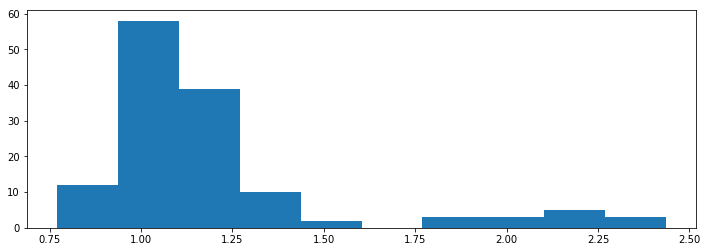

In [366]:
plt.hist(training_features['Alpha0'])

### data looks reasonably Gaussian.

# The machine learning model
I already stored away half of the data into "testing_features" earlier.
I'll now resplit the remaining data to testing and training.

In [387]:
# First lets separate labels

empathy_level = training_features['Empathy_level']
empathy_level_testing = testing_features['Empathy_level']

(array([63.,  0.,  0., 27.,  0.,  0., 36.,  0.,  0.,  9.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ],
       dtype=float32),
 <a list of 10 Patch objects>)

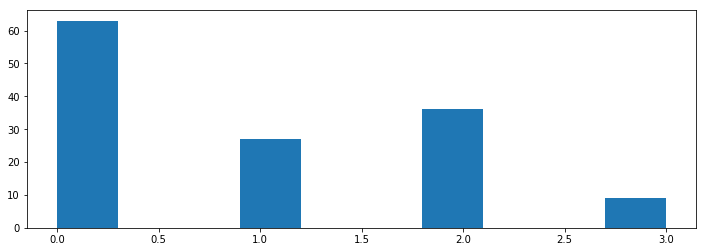

In [368]:
plt.hist(empathy_level)

# We have half of the events without any empathy, and half with some levels of empathy. Lets make binary variable between empathy / no empathy to simplify it instead of trying to predict different levels of empathy (not enough dat afor that)

In [388]:
empathy_labels = [ x if x == 0 else 1 for x in empathy_level]
empathy_labels_testing = [x if x == 0 else 1 for x in empathy_level_testing] 

In [413]:
training_features =training_features.drop(['Empathy_level', 'Subjectid','trialid'],axis=1)
testing_features =testing_features.drop(['Empathy_level', 'Subjectid','trialid'],axis=1)

In [371]:
import sklearn

In [372]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_features,
                                                   empathy_labels,
                                                   test_size =0.2)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 108 samples.
Testing set has 27 samples.


# Test few different classifiers

In [373]:
# Testing gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import fbeta_score, accuracy_score
GB_clf = GradientBoostingClassifier()

GB_model = GB_clf.fit(X_train, y_train)
GB_predictions_train = GB_model.predict(X_train)
GB_predictions_test = GB_model.predict(X_test)
GB_acc_train = accuracy_score(y_train,GB_predictions_train)
GB_acc_test = accuracy_score(y_test,GB_predictions_test)
GB_fbeta_train = fbeta_score(y_train,GB_predictions_train, beta=0.5)
GB_fbeta_test = fbeta_score(y_test,GB_predictions_test, beta=0.5)

print("Gradient boosting test accuracy:{}, fbeta:{}".format(GB_acc_test,GB_fbeta_test))
#results = train_predict(GB_clf, X_train,y_train,X_test, y_test)

Gradient boosting test accuracy:0.6666666666666666, fbeta:0.6


In [374]:
# Testing random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, accuracy_score,confusion_matrix
rf_clf = GradientBoostingClassifier()
rf_clf = RandomForestClassifier()

rf_model = rf_clf.fit(X_train, y_train)
rf_predictions_train = rf_model.predict(X_train)
rf_predictions_test = rf_model.predict(X_test)
rf_acc_train = accuracy_score(y_train,rf_predictions_train)
rf_acc_test = accuracy_score(y_test,rf_predictions_test)
rf_fbeta_train = fbeta_score(y_train,rf_predictions_train, beta=0.5)
rf_fbeta_test = fbeta_score(y_test,rf_predictions_test, beta=0.5)

print("Random Forst test accuracy:{}, fbeta:{}".format(rf_acc_test,rf_fbeta_test))


Random Forst test accuracy:0.5185185185185185, fbeta:0.4819277108433735


In [375]:
import xgboost as xgb

In [376]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgb_model.fit(X_train,y_train)
xgb_predictions_train = xgb_model.predict(X_train)
xgb_predictions_test = xgb_model.predict(X_test)

xgb_acc_train = accuracy_score(y_train,xgb_predictions_train)
xgb_acc_test = accuracy_score(y_test,xgb_predictions_test)
xgb_fbeta_train = fbeta_score(y_train,xgb_predictions_train, beta=0.5)
xgb_fbeta_test = fbeta_score(y_test,xgb_predictions_test, beta=0.5)

print("XBoost test accuracy:{}, fbeta:{}".format(xgb_acc_test,xgb_fbeta_test))


XBoost test accuracy:0.6666666666666666, fbeta:0.6


In [377]:
from sklearn.model_selection import permutation_test_score

score, permutation_scores, pvalue = permutation_test_score(
    rf_model, X_test, y_test, scoring="accuracy", cv=None, n_permutations=100, n_jobs=1)

print("Permutation test with random forest gave us average accuracy of {} with p-value {}".format(score,pvalue))

score, permutation_scores, pvalue = permutation_test_score(
    GB_model, X_test, y_test, scoring="accuracy", cv=None, n_permutations=100, n_jobs=1)

print("Permutation test with Gradient Boosting gave us average accuracy of {} with p-value {}".format(score,pvalue))


score, permutation_scores, pvalue = permutation_test_score(
    xgb_model, X_test, y_test, scoring="accuracy", cv=None, n_permutations=100, n_jobs=1)

print("Permutation test with XGBoosting gave us average accuracy of {} with p-value {}".format(score,pvalue))

Permutation test with random forest gave us average accuracy of 0.5148148148148147 with p-value 0.6138613861386139
Permutation test with Gradient Boosting gave us average accuracy of 0.3398148148148148 with p-value 0.9306930693069307
Permutation test with XGBoosting gave us average accuracy of 0.5601851851851852 with p-value 0.33663366336633666


## As expected, XGB performs the best, though they all perform badly


In [380]:
xgb_predictions_test =xgb_model.predict(X_test)

In [381]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, xgb_predictions_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6903409090909092

In [382]:
pvalue

0.33663366336633666

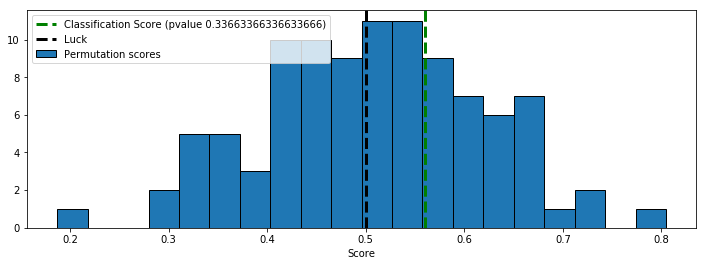

In [378]:
# #############################################################################
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
# BUG: vlines(..., linestyle='--') fails on older versions of matplotlib
# plt.vlines(score, ylim[0], ylim[1], linestyle='--',
#          color='g', linewidth=3, label='Classification Score'
#          ' (pvalue %s)' % pvalue)
# plt.vlines(1.0 / n_classes, ylim[0], ylim[1], linestyle='--',
#          color='k', linewidth=3, label='Luck')
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

# Does not look very good but this was only on the small prototest set sliced off the training set. lets see how it performs on the unseen test set.

In [414]:
score, permutation_scores, pvalue = permutation_test_score(
    xgb_model, testing_features, empathy_labels_testing, scoring="accuracy", cv=None, n_permutations=1000, n_jobs=1)

print("Permutation test with XGBoosting gave us average accuracy of {} with p-value {}".format(score,pvalue))

Permutation test with XGBoosting gave us average accuracy of 0.5777777777777778 with p-value 0.03296703296703297


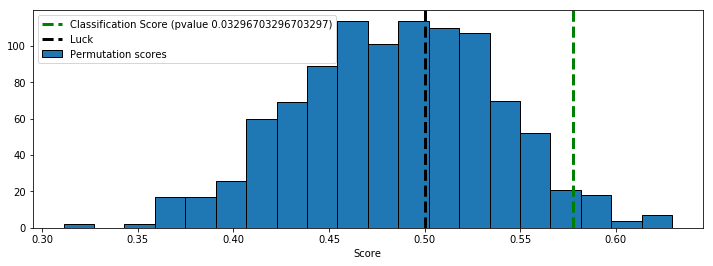

In [415]:
# #############################################################################
# View histogram of permutation scores
plt.hist(permutation_scores, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()

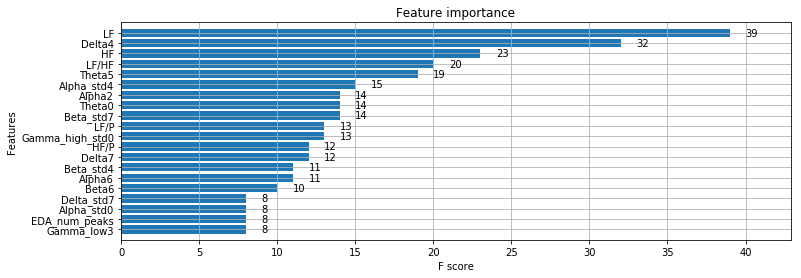

In [416]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features=20,height=0.8)

# We have a statistically significant result! We are able to classify between empathetic and non-empathetic narrative events with 57% accuracy